#### implementation

In [1]:
# dataset
import numpy as np
import matplotlib.pyplot as plt
import random

def get_column(data, index):
    result = [row[index] for row in data]
    return result

def prepare_data(file_name_dataset):
  data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
  N = len(data)

  # get tv (index=0)
  tv_data = get_column(data, 0)

  # get radio (index=1)
  radio_data = get_column(data, 1)

  # get newspaper (index=2)
  newspaper_data = get_column(data, 2)

  # get sales (index=3)
  sales_data = get_column(data, 3)

  # building X input  and y output for training
  X = [tv_data, radio_data, newspaper_data]
  y = sales_data
  return X,y

In [2]:
X,y = prepare_data('advertising.csv')
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list)

[624.1, 175.10000000000002, 300.5, 78.9]


In [3]:
# compute output and loss
def predict(x1, x2, x3, w1, w2, w3, b):
    return w1*x1 + w2*x2 + w3*x3 + b

def compute_loss_mse(y_hat, y):
    return (y_hat - y)**2

def compute_loss_mae(y_hat, y):
    return abs(y_hat - y)

# compute gradient
def compute_gradient_wi(xi, y, y_hat):
    dl_dwi = 2*xi*(y_hat-y)
    return dl_dwi

def compute_gradient_b(y, y_hat):
    dl_db = 2*(y_hat-y)
    return dl_db

# update weights
def update_weight_wi(wi, dl_dwi, lr):
    wi = wi - lr*dl_dwi
    return wi

def update_weight_b(b, dl_db, lr):
    b  = b - lr*dl_db
    return b

In [ ]:

y_p = predict(x1 = 1, x2 =1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
print(y_p)

1.0


In [ ]:
l = compute_loss_mse(y_hat=1, y=0.5)
print(l)

0.25


In [ ]:
l = compute_loss_mae(y_hat=1, y=0.5)
print(l)

0.5


In [ ]:
# compute gradient
g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
print(g_wi)

-1.0


In [ ]:
g_b =  compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)

-3.0


In [ ]:
after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr = 1e-5)
print(after_wi)

1.000005


In [ ]:
after_b = update_weight_b(b=0.5, dl_db=-1.0, lr = 1e-5)
print(after_b)


0.50001


In [4]:
def initialize_params():
    # w1 = random.gauss(mu=0.0, sigma=0.01)
    # w2 = random.gauss(mu=0.0, sigma=0.01)
    # w3 = random.gauss(mu=0.0, sigma=0.01)
    # b  = 0

    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b

print(initialize_params())

(0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)


In [5]:

def implement_linear_regression(X_data, y_data, epoch_max = 50,lr = 1e-5):
  losses = []

  w1, w2, w3, b = initialize_params()

  N = len(y_data)
  for epoch in range(epoch_max):
      for i in range(N):
          # get a sample
          x1 = X_data[0][i]
          x2 = X_data[1][i]
          x3 = X_data[2][i]

          y  = y_data[i]

          # print(y)
          # compute output
          y_hat = predict(x1, x2, x3, w1, w2, w3, b)

          # compute loss
          loss = compute_loss_mse(y, y_hat)

          # compute gradient w1, w2, w3, b
          dl_dw1 = compute_gradient_wi(x1, y, y_hat)
          dl_dw2 = compute_gradient_wi(x2, y, y_hat)
          dl_dw3 = compute_gradient_wi(x3, y, y_hat)
          dl_db  = compute_gradient_b(y, y_hat)

          # update parameters
          w1 = update_weight_wi(w1, dl_dw1, lr)
          w2 = update_weight_wi(w2, dl_dw2, lr)
          w3 = update_weight_wi(w3, dl_dw3, lr)
          b  = update_weight_b(b, dl_db, lr)

          # logging
          losses.append(loss)
  return (w1,w2,w3,b, losses)

[326.9667843262905, 16.813661135067065, 53.03153479688057, 9.097721194637154, 3.6424308051668244, 7.563752860234681, 22.66109565599889, 0.2903595791172754, 14.838547485180843, 24.076309414072263, 40.37629497003938, 5.1268803606027795, 13.518222414308081, 29.260234447005313, 6.298237914505083, 9.162549922566846, 0.026579461634628335, 26.706667137444764, 31.588025437397253, 7.299166664675038, 4.87832661040257, 0.06589490698448672, 4.659432930180689, 8.197887498801554, 10.726801676543044, 46.88850553057548, 37.00183951157569, 7.945648850356329, 13.192456099944478, 12.99508446043089, 3.692858118961234, 8.94362747789156, 30.181447411539107, 11.431671284831852, 36.174366413011626, 7.460278650398524, 86.65149410437682, 5.3701391264310505, 5.3518169904114785, 46.336728755672745, 2.5374346878656464, 1.4161484943898264, 6.706004362616138, 15.295560375546378, 9.923480328914641, 0.04638468028698762, 1.7385993721560624, 1.6392488216093404, 9.405606514050849, 5.91762067788424, 0.22728553410458135, 7

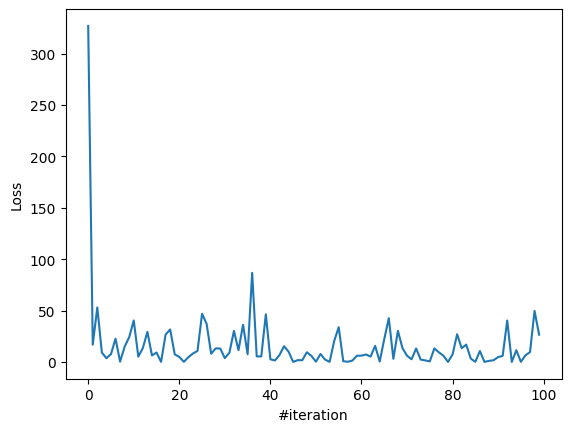

In [6]:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression(X,y)
print(losses[0:100])
plt.plot(losses[0:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [7]:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression(X,y)
print(w1,w2,w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


#### Inference

In [ ]:

# given new data
tv = 19.2
radio = 35.9
newspaper = 51.3

X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression(X,y)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is 8.176413319549823


In [ ]:
# [230.1, 37.8, 69.2, 22.1]

tv = 230.1
radio = 37.8
newspaper = 69.2

sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is 24.412408996908397


In [8]:

def implement_linear_regression_nsamples(X_data, y_data, epoch_max = 50,lr = 1e-5):
  losses = []

  w1, w2, w3, b = initialize_params()
  N = len(y_data)

  for epoch in range(epoch_max):

      loss_total = 0.0
      dw1_total = 0.0
      dw2_total = 0.0
      dw3_total = 0.0
      db_total  = 0.0

      for i in range(N):
          # get a sample
          x1 = X_data[0][i]
          x2 = X_data[1][i]
          x3 = X_data[2][i]

          y  = y_data[i]

          # print(y)
          # compute output
          y_hat = predict(x1, x2, x3, w1, w2, w3, b)

          # compute loss
          loss = compute_loss_mse(y, y_hat)
          loss_total = loss_total + loss

          # compute gradient w1, w2, w3, b
          dl_dw1 = compute_gradient_wi(x1, y, y_hat)
          dl_dw2 = compute_gradient_wi(x2, y, y_hat)
          dl_dw3 = compute_gradient_wi(x3, y, y_hat)
          dl_db  = compute_gradient_b(y, y_hat)

         # accumulate
          dw1_total = dw1_total + dl_dw1
          dw2_total = dw2_total + dl_dw2
          dw3_total = dw3_total + dl_dw3
          db_total = db_total + dl_db

      # (after processing N samples) - update parameters
      w1 = update_weight_wi(w1, dl_dw1/N, lr)
      w2 = update_weight_wi(w2, dl_dw2/N, lr)
      w3 = update_weight_wi(w3, dl_dw3/N, lr)
      b  = update_weight_b(b, dl_db/N, lr)


      # logging
      losses.append(loss_total/N)
  return (w1,w2,w3,b, losses)

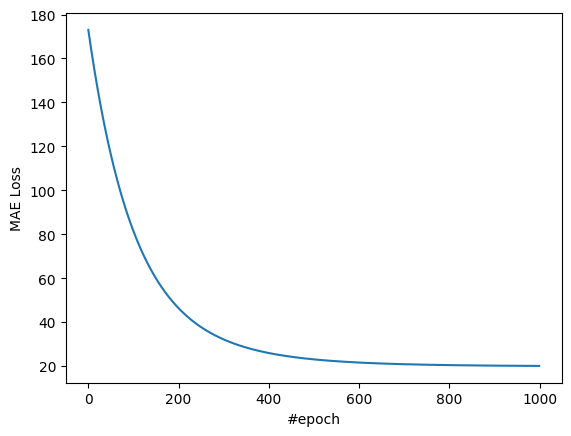

In [9]:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression_nsamples(X,y,1000)
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MAE Loss")
plt.show()

In [10]:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression_nsamples(X,y,1000)
print(w1,w2,w3)

0.07865211655017688 0.009363049405216773 3.387579445815582e-06


### Data normalization

In [ ]:
# MIN-MAX SCALING - X_norm = (X - X.min()) / (X.max() - X.min())
# Min-Max Scaling is a simple method of normalization that scales the values between 0 and 1
def min_max_scaling(X):

    max_value_1 = max(X[0])
    max_value_2 = max(X[1])
    max_value_3 = max(X[2])

    min_value_1 = min(X[0])
    min_value_2 = min(X[1])
    min_value_3 = min(X[2])

    max_list = [max_value_1, max_value_2, max_value_3]
    min_list = [min_value_1, min_value_2, min_value_3]


    X[0] = [(x - min_value_1) / (max_value_1 - min_value_1) for x in X[0]]
    X[1] = [(x - max_value_2) / (max_value_2 - min_value_2) for x in X[1]]
    X[2] = [(x - max_value_3) / (max_value_3 - min_value_3) for x in X[2]]

    return X

In [ ]:
def z_mean_scaling(X):

    mean_value_1 = sum(X[0]) / len(X[0])
    mean_value_2 = sum(X[1]) / len(X[1])
    mean_value_3 = sum(X[2]) / len(X[2])



    std_value_1 = (sum((x-(sum(X[0]) / len(X[0])))**2 for x in X[0]) / (len(X[0])-1))**0.5
    std_value_2 = (sum((x-(sum(X[1]) / len(X[1])))**2 for x in X[1]) / (len(X[1])-1))**0.5
    std_value_3 = (sum((x-(sum(X[2]) / len(X[2])))**2 for x in X[2]) / (len(X[2])-1))**0.5



    X[0] = [(x - mean_value_1) / (std_value_1) for x in X[0]]
    X[1] = [(x - mean_value_2) / (std_value_2) for x in X[1]]
    X[2] = [(x - mean_value_3) / (std_value_2) for x in X[2]]

    return X

In [ ]:
data1 = [1, 2, 3]
data2 = [4, 5, 6]
data3 = [7, 8, 9]
X = [data1, data2, data3]

X, min_list, max_list = min_max_scaling(X)
print(X)

[0.0, 0.5, 1.0]


https://pieriantraining.com/tutorial-how-to-normalize-data-in-python/

In [ ]:
# MIN-MAX SCALING - X_norm = (X - X.min()) / (X.max() - X.min())
# Min-Max Scaling is a simple method of normalization that scales the values between 0 and 1
def min_max_scaling(data1, data2, data3):
    data = data1 + data2 + data3

    max_value_1 = max(data1)
    max_value_2 = max(data2)
    max_value_3 = max(data3)

    min_value_1 = min(data1)
    min_value_2 = min(data2)
    min_value_3 = min(data3)

    data1 = [(x - min_value_1) / (max_value_1 - min_value_1) for x in data1]
    data2 = [(x - min_value_2) / (max_value_2 - min_value_2) for x in data2]
    data3 = [(x - min_value_3) / (max_value_3 - min_value_3) for x in data3]

    return (data1, data2, data3, max_value_1, max_value_2, max_value_3, min_value_1, min_value_2, min_value_3)

In [ ]:
def scaling(X):
    data1 = X[0]
    data2 = X[1]
    data3 = X[2]
    data = data1 + data2 + data3

    print(data)
    max_value = max(data)
    min_value = min(data)
    mean_value = sum(data) / len(data)

    data1 = [(x - mean_value) / (max_value - min_value) for x in data1]
    data2 = [(x - mean_value) / (max_value - min_value) for x in data2]
    data3 = [(x - mean_value) / (max_value - min_value) for x in data3]

    return [data1, data2, data3]

In [ ]:
(tv_data, radio_data, newspaper_data), (mean_v, max_v, min_v) = scaling(data1, data2, data3)
print(data1_n, data2_n, data3_n)

TypeError: scaling() takes 1 positional argument but 3 were given